In [1]:
import pickle
import json
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_context('paper')

# Fire rate / current external

In [3]:
rates, currents, CV, v_soma = [], [], {}, {}

for batch_number in range(1,21):
    batch_number = str(batch_number).zfill(4)

    for current in range(5):
        with open(f'../data3/v1_batch{batch_number}/v1_batch{batch_number}_0_{current}_data.pkl', 'rb') as f:
            data = pickle.load(f)
        amp = data['simConfig']['IClamp0']['amp']
        time = data['simData']['t']
        currents.append(amp)
        v_soma[amp] = data['simData']['V_soma']['cell_0']


        with open(f'../data3/v1_batch{batch_number}/v1_batch{batch_number}_0_{current}_rate.json', 'rb') as f:
            rate = json.load(f)
        rates.append(np.mean(rate['statData']))

        with open(f'../data3/v1_batch{batch_number}/v1_batch{batch_number}_0_{current}_CV.json', 'rb') as f:
            cv = json.load(f)
        CV[amp] = np.mean(cv['statData'])

for batch_number in range(1,14):
    batch_number = str(batch_number).zfill(4)

    for current in range(4):
        with open(f'../data3/v2_batch{batch_number}/v2_batch{batch_number}_0_{current}_data.pkl', 'rb') as f:
            data = pickle.load(f)
        amp = data['simConfig']['IClamp0']['amp']
        currents.append(amp)
        v_soma[amp] = data['simData']['V_soma']['cell_0']

        with open(f'../data3/v2_batch{batch_number}/v2_batch{batch_number}_0_{current}_rate.json', 'rb') as f:
            rate = json.load(f)
        rates.append(np.mean(rate['statData']))

        with open(f'../data3/v2_batch{batch_number}/v2_batch{batch_number}_0_{current}_CV.json', 'rb') as f:
            cv = json.load(f)
        CV[amp] = np.mean(cv['statData'])

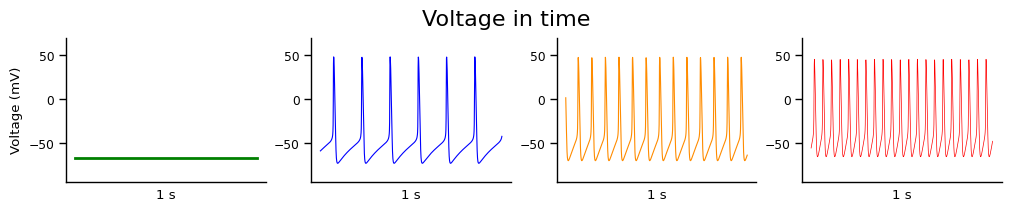

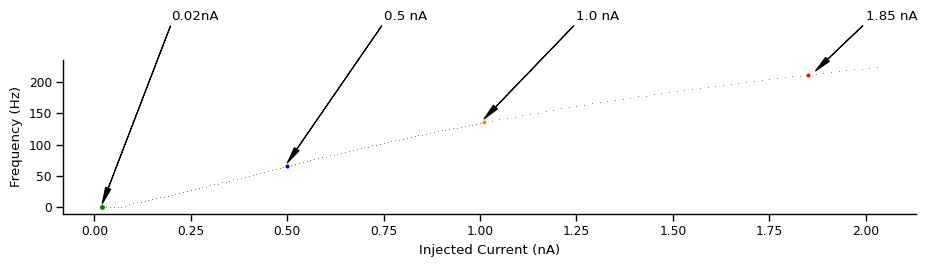

In [4]:

f, ax = plt.subplots(1,4, figsize=(10,2), layout='constrained')
f.suptitle('Voltage in time', fontsize=16)
ax0, ax1, ax2, ax3 = ax
sns.lineplot(x = time[-1000:], y = v_soma[0.02][-1000:], color='green', ax=ax0, linewidth=2)
#ax0.set_title(f'0.02 nA', fontsize=14)
sns.lineplot(x = time[-1000:], y = v_soma[0.5][-1000:], color='blue', ax=ax1, linewidth=0.8)
#ax1.set_title(f'0.5 nA', fontsize=12)
sns.lineplot(x = time[-1000:], y = v_soma[1.0][-1000:], color='darkorange', ax=ax2, linewidth=0.8)
#ax2.set_title('1.0 nA', fontsize=14)

sns.lineplot(x = time[-1000:], y = v_soma[1.85][-1000:], color='red', ax=ax3, linewidth=0.5)
#ax3.set_title('1.85 nA')

ax0.set_ylabel('Voltage (mV)')
for axis in ax:
    axis.set_ylim(-95, 70)
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.set_xlabel('1 s')
    axis.set_xticklabels(['','',''])
    axis.set_xticks([], major=True)



plt.show()

f, ax = plt.subplots(1,1, figsize=(11,2)) #figsize=(12,2))
arrowprops = dict(facecolor='black', width=0.009 , headwidth=4)
delta = 5

#ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5), arrowprops=dict(facecolor='black', shrink=0.005))
sns.scatterplot(x = currents, y = rates, color='black', s=0.4, ax=ax)

sns.scatterplot(x = currents[:1], y = rates[:1], color='green', s=15, ax=ax)
ax.annotate('0.02nA', xy=( currents[0], rates[0]+delta), xytext=(0.2, 300), arrowprops=arrowprops)

sns.scatterplot(x = currents[48:49], y = rates[48:49], color='blue', s=10, ax=ax)
ax.annotate('0.5 nA', xy=( currents[48], rates[48]+delta), xytext=(0.75, 300), arrowprops=arrowprops)

sns.scatterplot(x = currents[99:100], y = rates[99:100], color='darkorange', s=10, ax=ax)
ax.annotate('1.0 nA', xy=( currents[99], rates[99]+delta), xytext=(1.25, 300), arrowprops=arrowprops)

sns.scatterplot(x = currents[142:143], y = rates[142:143], color='red', s=10, ax=ax)
ax.annotate('1.85 nA', xy=(currents[143], rates[143]+delta), xytext=(2., 300), arrowprops=arrowprops)

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('Injected Current (nA)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [5]:
for i in range(20):
    print(f'({currents[i]:.3f} nA, {rates[i]:.3f} Hz)')

(0.020 nA, 0.000 Hz)
(0.030 nA, 0.000 Hz)
(0.040 nA, 0.000 Hz)
(0.050 nA, 0.667 Hz)
(0.060 nA, 0.667 Hz)
(0.070 nA, 0.667 Hz)
(0.080 nA, 1.333 Hz)
(0.090 nA, 4.667 Hz)
(0.100 nA, 6.000 Hz)
(0.110 nA, 7.333 Hz)
(0.120 nA, 8.667 Hz)
(0.130 nA, 10.000 Hz)
(0.140 nA, 11.333 Hz)
(0.150 nA, 12.667 Hz)
(0.160 nA, 14.000 Hz)
(0.170 nA, 15.333 Hz)
(0.180 nA, 16.667 Hz)
(0.190 nA, 18.000 Hz)
(0.200 nA, 19.533 Hz)
(0.210 nA, 21.333 Hz)


Note que ocorre disparos a partir de $0.5nA$.

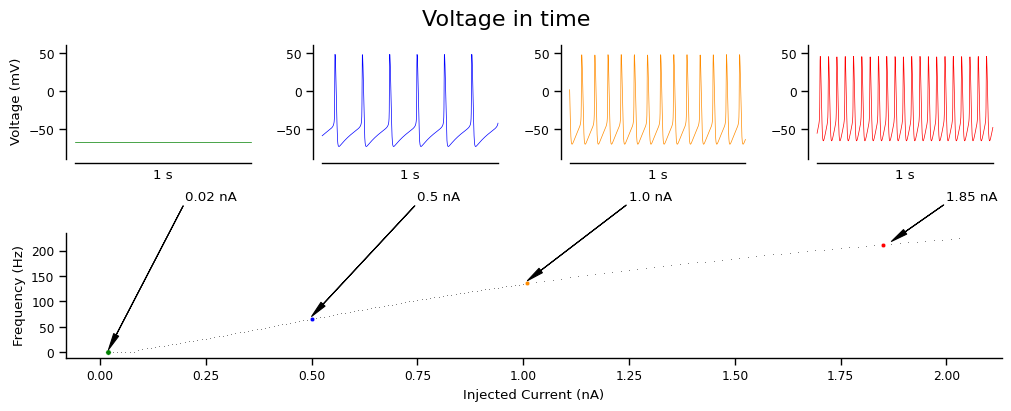

In [6]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(layout="constrained", figsize=(10,4))
gs = GridSpec(2, 4, figure=fig,) #height_ratios=)

# voltage plot
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[0, 3])
ax = [ax0,ax1,ax2,ax3]
#sns.lineplot(x = time[-1000:], y = v_soma[0.02][-1000:], color='green', ax=ax0, linewidth=2)

amps = [0.02, 0.5, 1.0, 1.85]
color = ['green','blue','darkorange','red']
ax0.set_ylabel('Voltage (mV)')

for i, axis in enumerate(ax):
    t = np.array(time[-1000:])
    v = np.array(v_soma[amps[i]][-1000:])
    sns.lineplot(x = t, y = v, color=color[i], ax=axis, linewidth=0.5)

    axis.set_ylim(-95, 70)
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.set_xlabel('1 s')
    axis.set_xticklabels(['','',''])
    axis.set_xticks([], major=True)

    axis.spines.bottom.set_bounds(t.min(), t.max())
    axis.spines.left.set_bounds(-90, 60)
    

# frequency/current plot
ax5 = fig.add_subplot(gs[1, :])
#ax5.set_ylim(-90, 50)
#sns.lineplot(x = time[-100:], y = v_soma[0.02][-100:], color='green', ax=ax5, linewidth=2)
arrowprops = dict(facecolor='black', width=0.009 , headwidth=4)
delta = 5

#ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5), arrowprops=dict(facecolor='black', shrink=0.005))
sns.scatterplot(x = currents, y = rates, color='black', s=0.4, ax=ax5)

sns.scatterplot(x = currents[:1], y = rates[:1], color='green', s=15, ax=ax5)
ax5.annotate('0.02 nA', xy=( currents[0], rates[0]+delta), xytext=(0.2, 300), arrowprops=arrowprops)

sns.scatterplot(x = currents[48:49], y = rates[48:49], color='blue', s=10, ax=ax5)
ax5.annotate('0.5 nA', xy=( currents[48], rates[48]+delta), xytext=(0.75, 300), arrowprops=arrowprops)

sns.scatterplot(x = currents[99:100], y = rates[99:100], color='darkorange', s=10, ax=ax5)
ax5.annotate('1.0 nA', xy=( currents[99], rates[99]+delta), xytext=(1.25, 300), arrowprops=arrowprops)

sns.scatterplot(x = currents[142:143], y = rates[142:143], color='red', s=10, ax=ax5)
ax5.annotate('1.85 nA', xy=(currents[143], rates[143]+delta), xytext=(2., 300), arrowprops=arrowprops)

ax5.set_ylabel('Frequency (Hz)')
ax5.set_xlabel('Injected Current (nA)')
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)

fig.suptitle('Voltage in time', fontsize=16)
#format_axes(fig)

path_figures = '../figures/'
fname = f'Voltage in time one Neuron'.replace(' ','_')
plt.savefig(path_figures + fname + '.png')

plt.show()

# Analyse raster plot

In [2]:
import pickle
import json
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_context('paper')

datas = {}
for batch in range(1,7):
    batch = str(batch).zfill(4)
    for current in range(4):
        try:
            with open(f'../data/v2_batch{batch}/v2_batch{batch}_0_{current}_data.pkl', 'rb') as f:
                data = pickle.load(f)
            gex = data['simConfig']['gex']
            amp = data['simConfig']['IClamp0']['amp']
            datas[f'{amp}_{gex}'] = data
        except:
            print(f'Error: to read {batch}_{current}')
            pass

        try:
            with open(f'../data/v2_batch{batch}/v2_batch{batch}_0_{current}_CV.json', 'rb') as f:
                data = json.load(f)
            datas[f'{amp}_{gex}']['CV'] = data
        except:
            print(f'Error: to read CV {batch}_{current}')
            pass

        try:
            with open(f'../data/v2_batch{batch}/v2_batch{batch}_0_{current}_rate.json', 'rb') as f:
                data = json.load(f)
            datas[f'{amp}_{gex}']['rate'] = data
        except:
            print(f'Error: to read rate {batch}_{current}')
            pass

        try:
            with open(f'../data/v2_batch{batch}/v2_batch{batch}_0_{current}_sync.json', 'rb') as f:
                data = json.load(f)
            datas[f'{amp}_{gex}']['sync'] = data
        except:
            print(f'Error: to read rate {batch}_{current}')
            pass

def get_numpy(data):
    mapa = np.zeros((100, len(data['simData']['t'])))
    for i, value in enumerate(data['simData']['V_soma'].values()):
        mapa[i] = value
    return mapa

Error: to read 0006_3
Error: to read CV 0006_3
Error: to read rate 0006_3
Error: to read rate 0006_3


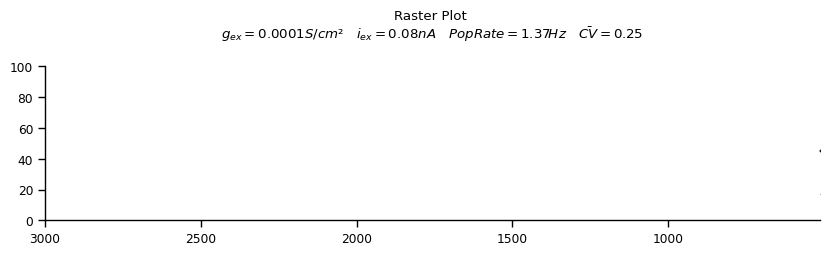

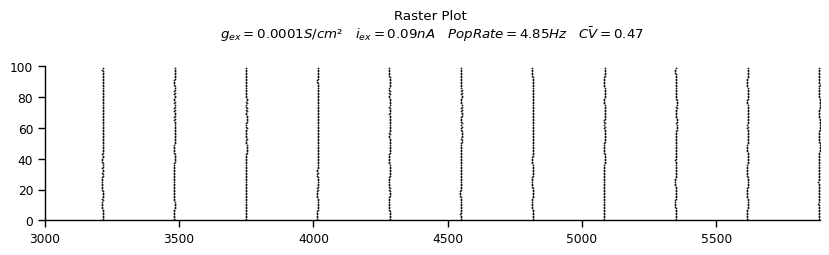

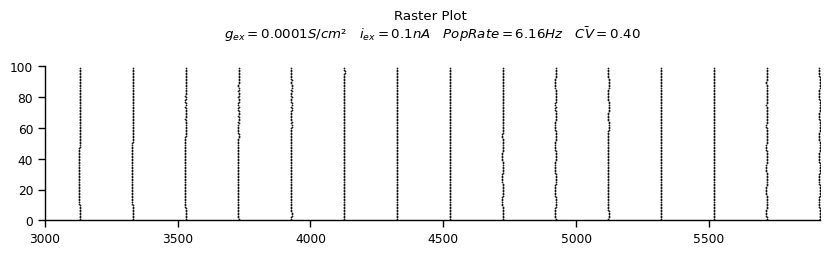

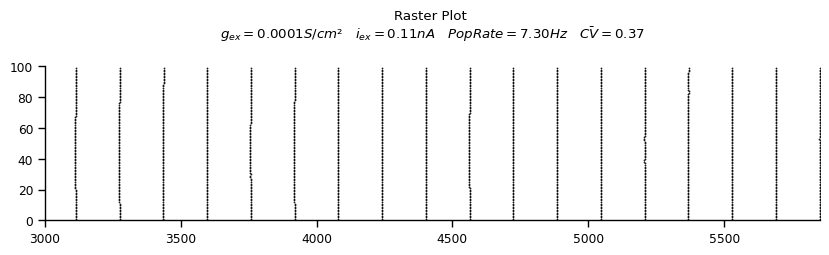

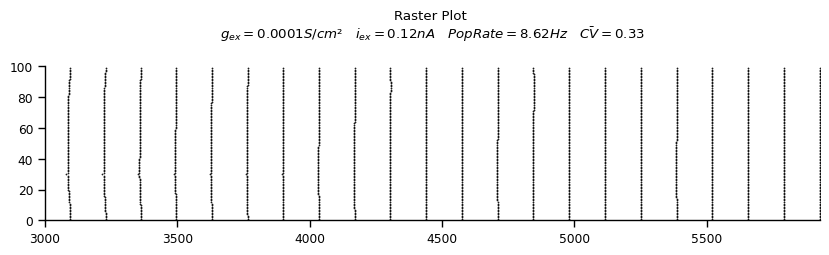

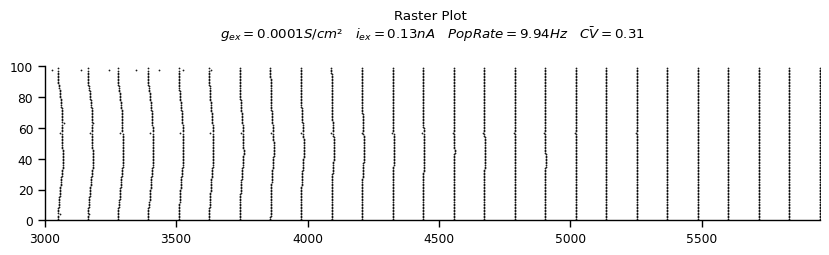

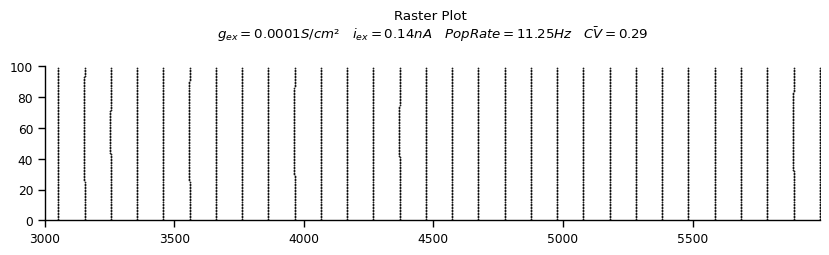

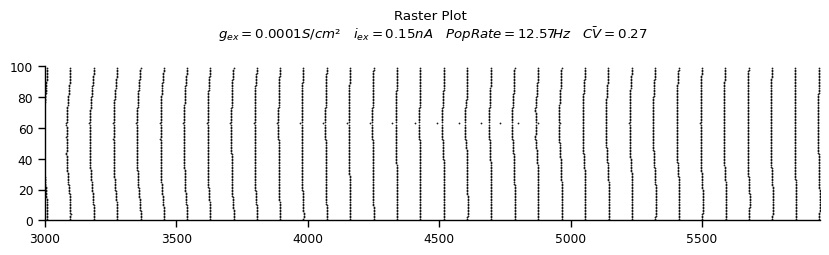

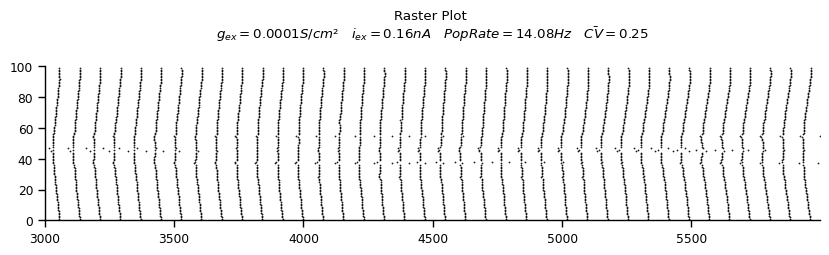

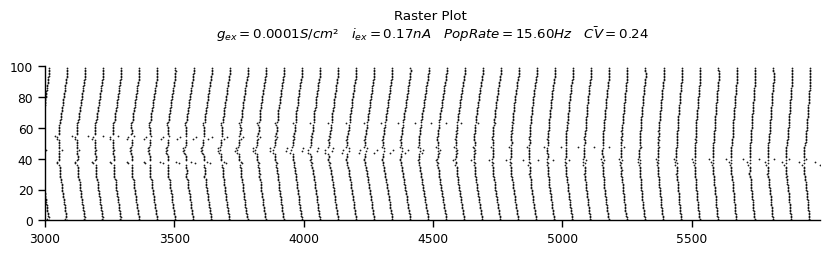

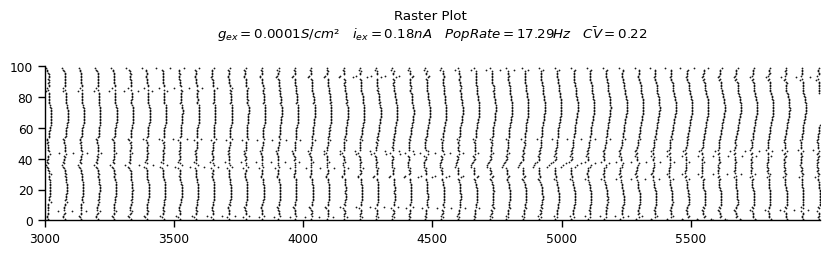

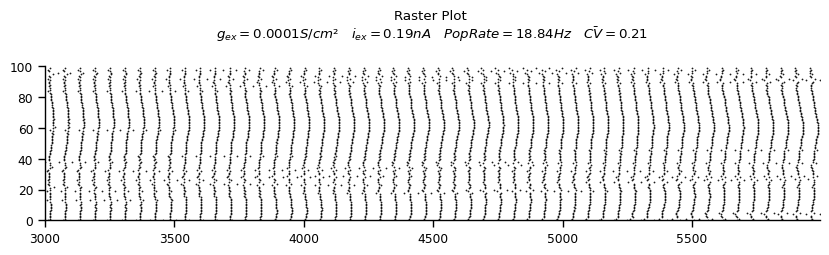

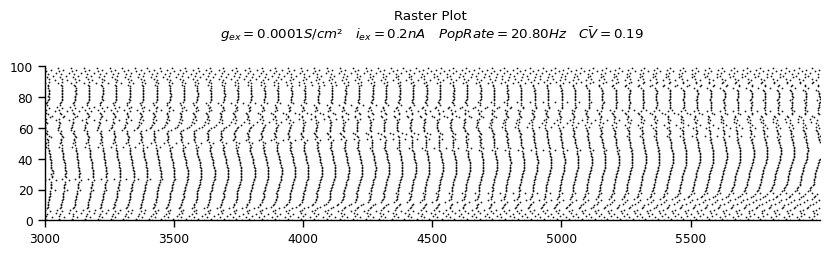

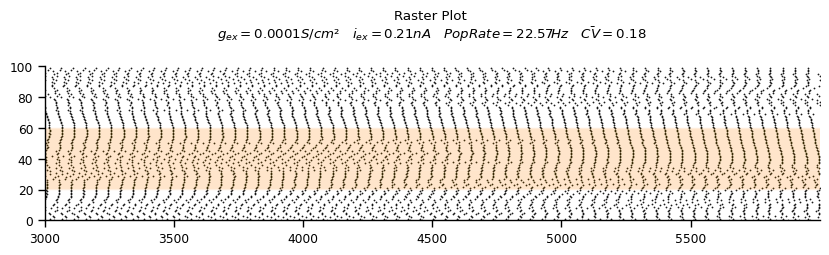

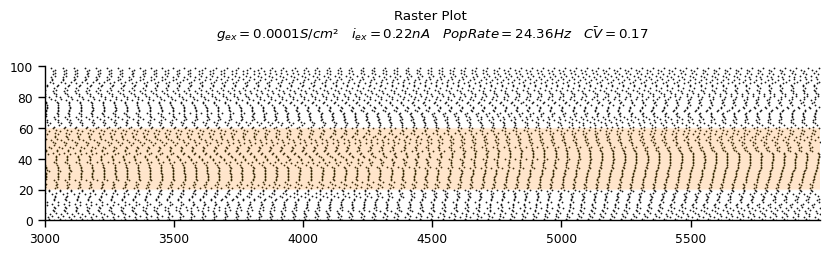

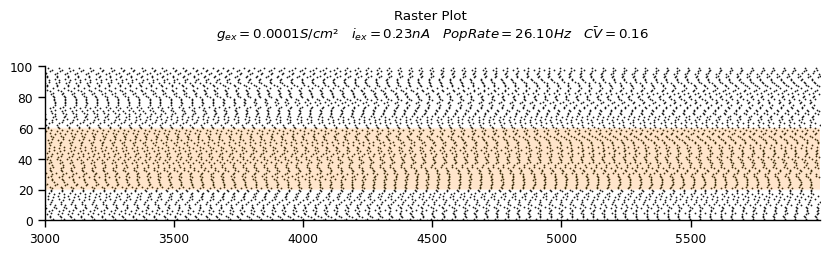

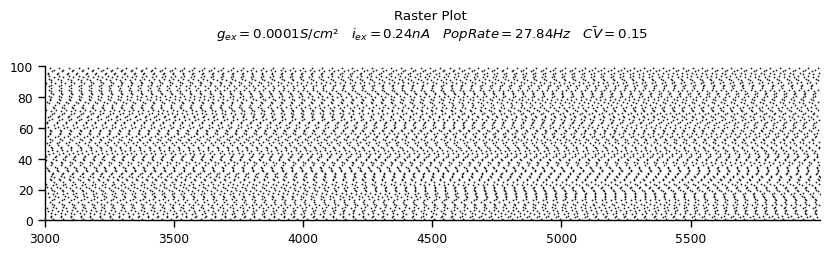

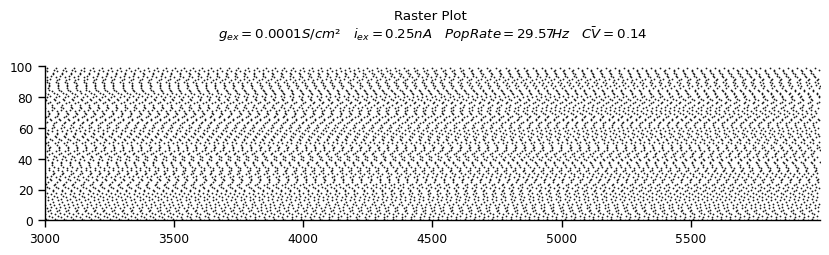

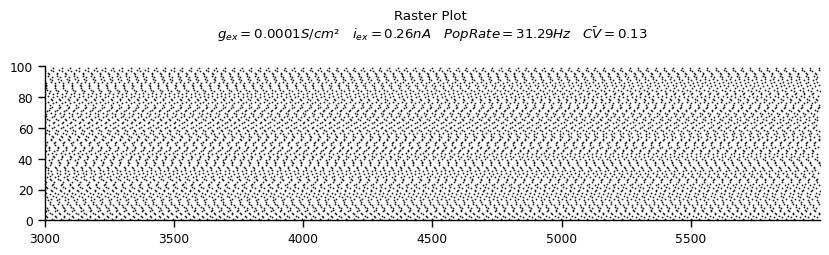

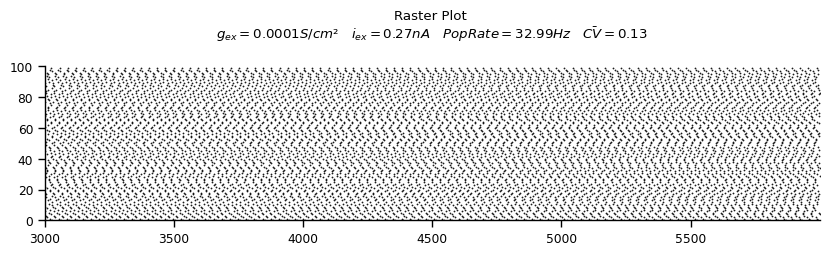

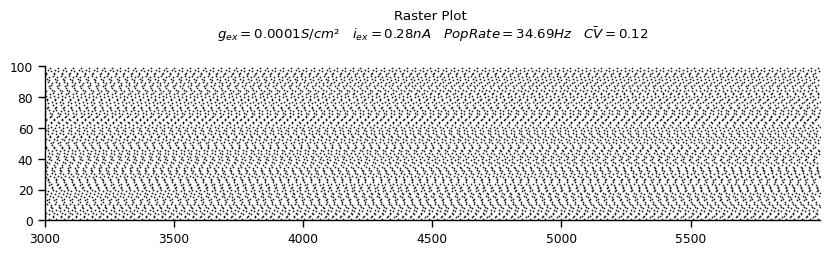

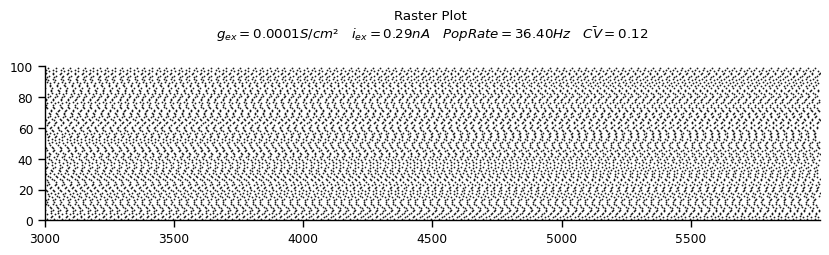

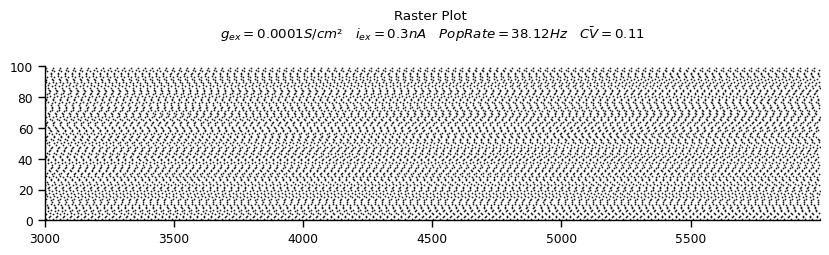

In [3]:
def plotRaster(data):
    gex = data['simConfig']['gex']
    amp = data['simConfig']['IClamp0']['amp']
    popRates = data['simData']['popRates']['sPY']
    sync = data['sync']['statData'][0][0]
    cv_bar = np.mean(data['CV']['statData'])

    spkid = np.array(data['simData']['spkid'])
    spkt = np.array(data['simData']['spkt'])

    fig, ax = plt.subplots(1,1, figsize=(10,2))

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    label_gex = f'{gex}'+'S/cm²'
    parameters = r'g_{ex}' + f'={label_gex}' + '\quad' + r'i_{ex}' + f'={amp}nA'+ '\quad'+ 'PopRate'+f'={popRates:.2f}Hz'+ '\quad'+'\\bar{CV}'+f'={cv_bar:.2f}'

    plt.title('Raster Plot \n$'+parameters+'$', pad=20)
    if amp in [0.21, 0.22, 0.23]:
        for i in np.arange(20,60,0.1):
            plt.hlines(i, 3000, spkt[-1], alpha=0.02, color='orange')
    plt.scatter(y = spkid, x = spkt, s=0.2, color='black')
    plt.xlim(3000, spkt[-1])
    plt.ylim(0,100)
    plt.show()

for data in datas.values():
    plotRaster(data)


```python
spkid = np.array(datas['0.3_0.0001']['simData']['spkid'][-5000:])
spkt = np.array(datas['0.3_0.0001']['simData']['spkt'][-5000:])

print(f'Spike time: min={spkt.min()} max={spkt.max()}')
print(spkt.shape)

plt.figure()
sns.scatterplot(y = spkid, x = spkt, s=0.8)
plt.show()

teste = pd.DataFrame({}, index = np.arange(spkt.min()-1,6001, dtype=np.float64))

for idx_spkt, t in enumerate(spkt):
    if t in teste.index:
        teste.loc[t,int(spkid[idx_spkt])] = 1
    else:
        teste.loc[t,int(spkid[idx_spkt])] = 0

teste = teste.fillna(0)
```

# plot potential with heatmap

In [4]:
def plotPotentialTime(data, figsize=(10,5), ti=-4000, tf = -1):
    mapa = get_numpy(data)
    gex = data['simConfig']['gex']
    amp = data['simConfig']['IClamp0']['amp']
    t = data['simConfig']['duration']
    fig, ax = plt.subplots(figsize = figsize)
    heatmap = sns.heatmap(mapa[:,ti:], cmap='rainbow', ax=ax,
                        cbar_kws={'label': 'Membrane potential $(mV)$'})

    heatmap.set(xlim = (0,-1*ti))
    xlabels = t - heatmap.get_xticks()
    xlabels = ['{:,.2f}'.format(x) if i%2!=0 else '' for i, x in enumerate(xlabels/1000)]
    xlabels = xlabels[::-1]
    heatmap.set_xticklabels(xlabels)

    plt.xticks(rotation=30)
    label_gex = f'{gex}'+' S/cm^{2}'
    plt.title(f'Potential in time, network parameters:\n gex = ${label_gex}$ | amp = {amp} nA', pad=20, fontsize=14)
    plt.ylabel('$n$-th neuron')
    plt.xlabel('time ($s$)')
    plt.show()

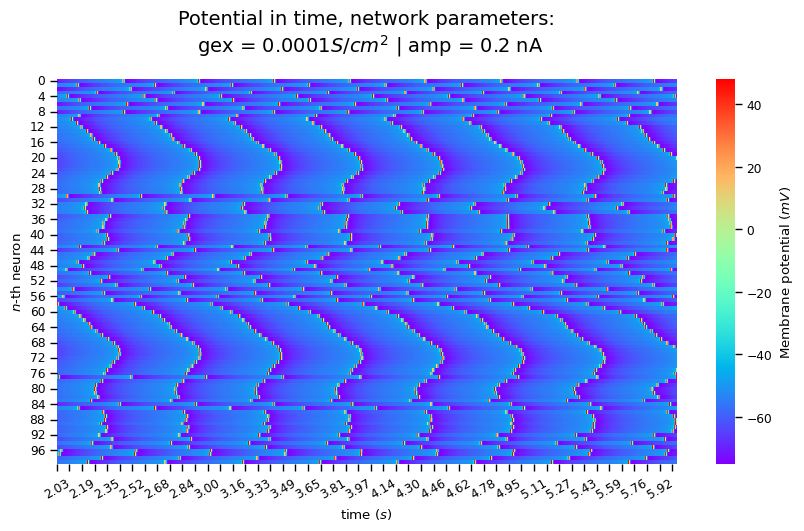

In [5]:
plotPotentialTime(datas['0.2_0.0001'])

# Plot potential

In [6]:
def plotPotential(data, ti = 0, tf = -1, cell=50):
    #------------------------------------------------------------------------------
    # Set arrays
    #------------------------------------------------------------------------------
    gex = data['simConfig']['gex']
    amp = data['simConfig']['IClamp0']['amp']
    dur = data['simConfig']['IClamp0']['dur']
    start = data['simConfig']['IClamp0']['start']
    recordStep = data['simConfig']['recordStep']

    voltage = np.array(list(data['simData']['V_soma'].values())[cell])
    time = np.array(data['simData']['t'])
    stim_current = np.array([0 if x < start/recordStep or x > (dur+start)/recordStep else amp for x in range(0, len(time))])

    voltage = voltage[ti:tf]
    time = time[ti:tf]
    stim_current = stim_current[ti:tf]

    #------------------------------------------------------------------------------
    # Plot figure
    #------------------------------------------------------------------------------
    f, (ax0, ax1) = plt.subplots(2,1, figsize=(10,3), gridspec_kw = {'height_ratios':[3, 1]})
    sns.lineplot(x = time, y =voltage, color='black', ax=ax0)
    ax1.plot(time, stim_current, 'gray')

    ax0.set_ylabel('Voltage (mV)')
    ax0.spines['right'].set_visible(False)
    ax0.spines['top'].set_visible(False)
    ax0.spines['bottom'].set_visible(False)
    ax0.get_xaxis().set_visible(False)

    ax1.plot([0,0],[0,0.15],'k')
    label_gex = f'{gex}'+' S/cm^{2}'
    ax1.text(20, 0.125, f'{stim_current.max()}nA | '+label_gex,va='center')
    ax1.set_ylabel('I (nA)')
    ax1.set_xlabel('t (ms)')

    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.get_yaxis().set_visible(False)
    
    plt.show()

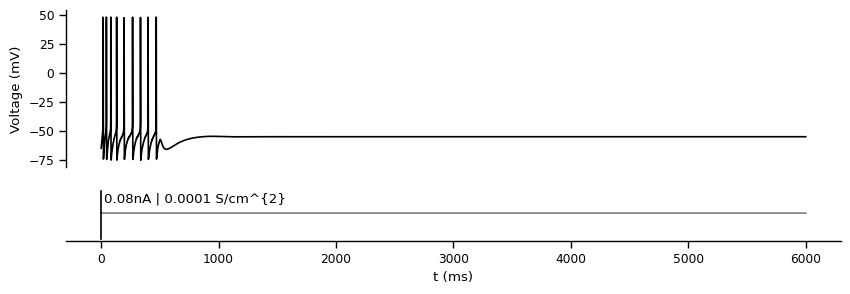

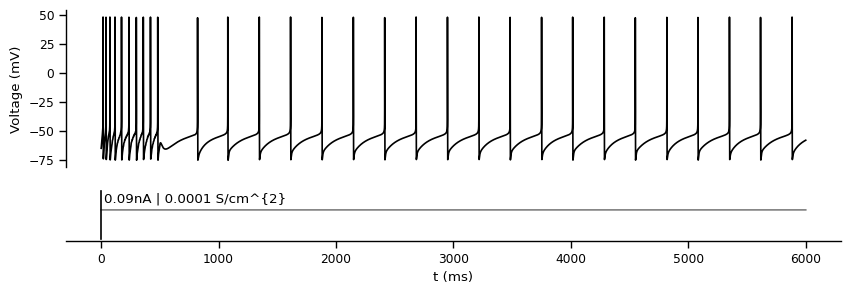

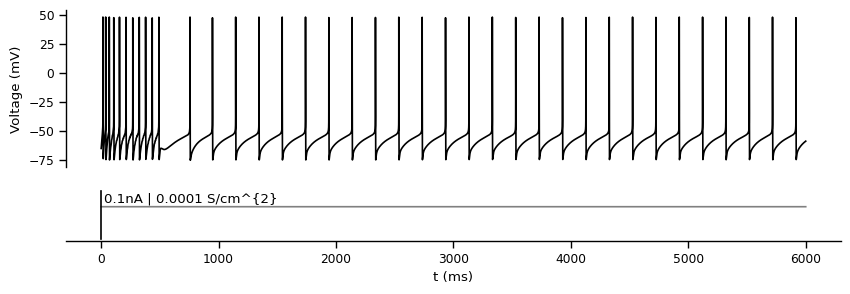

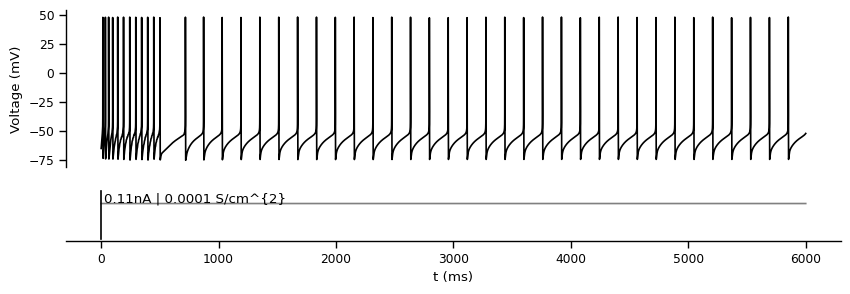

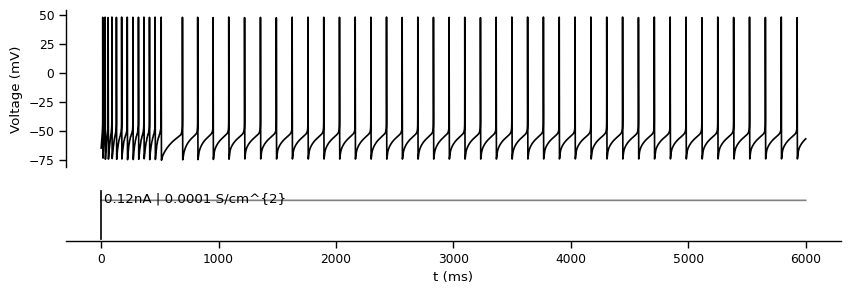

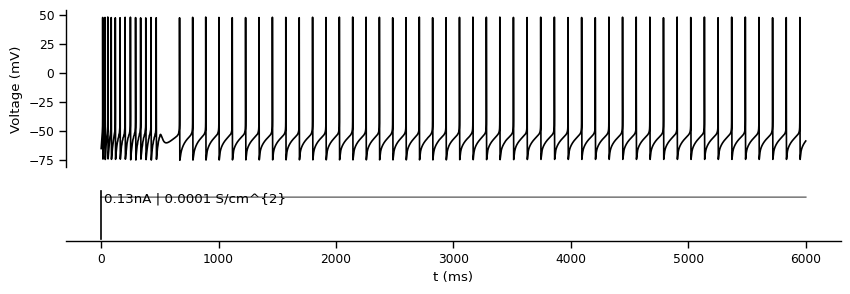

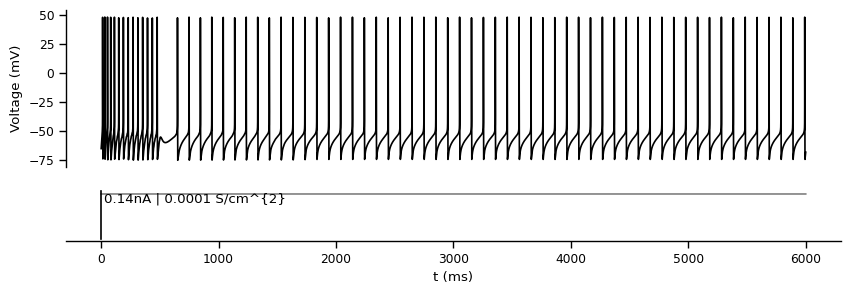

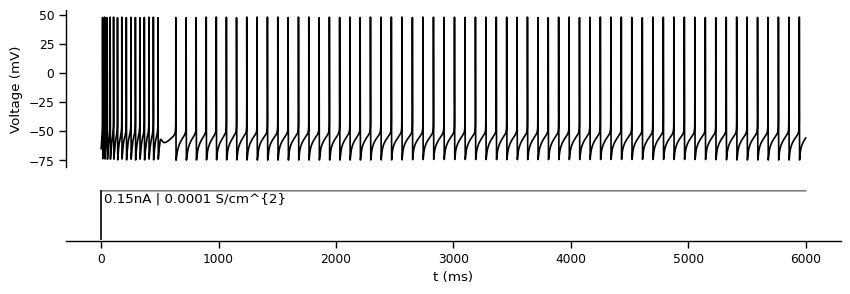

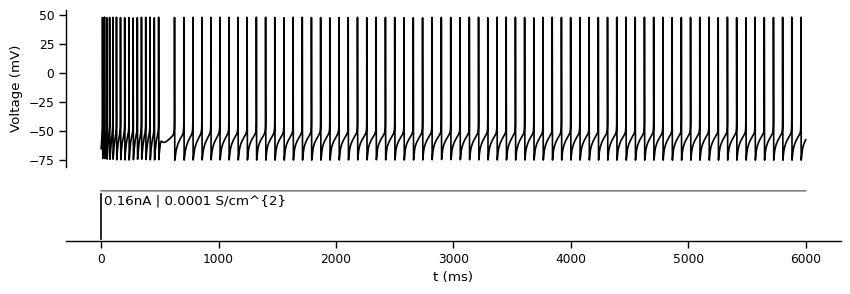

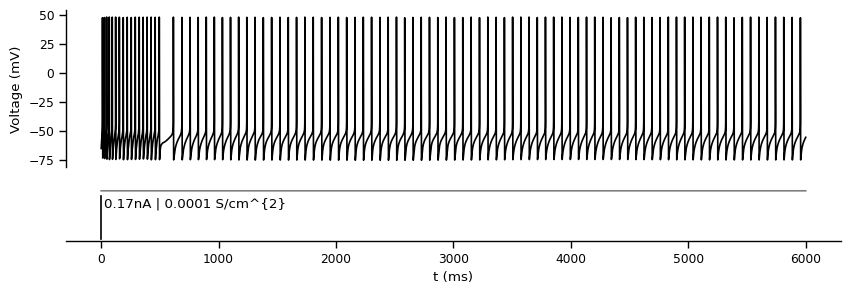

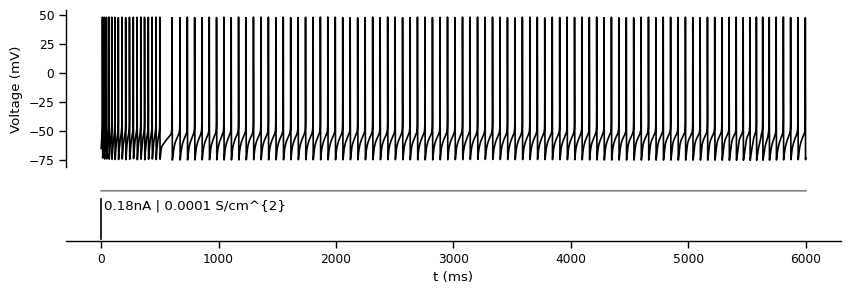

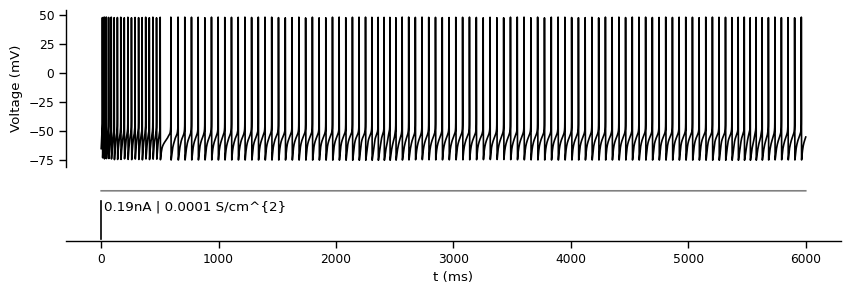

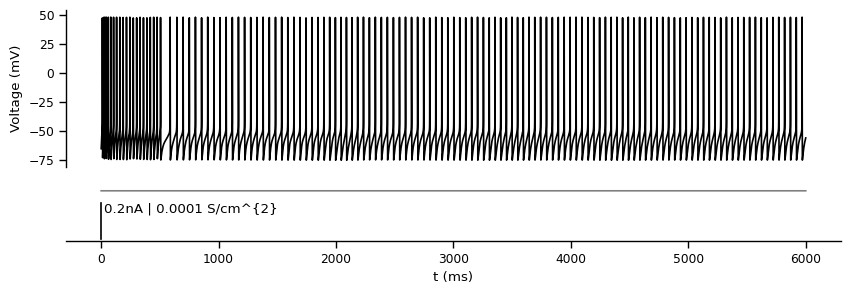

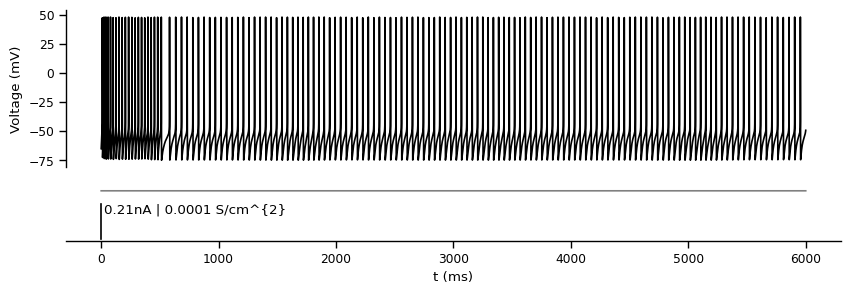

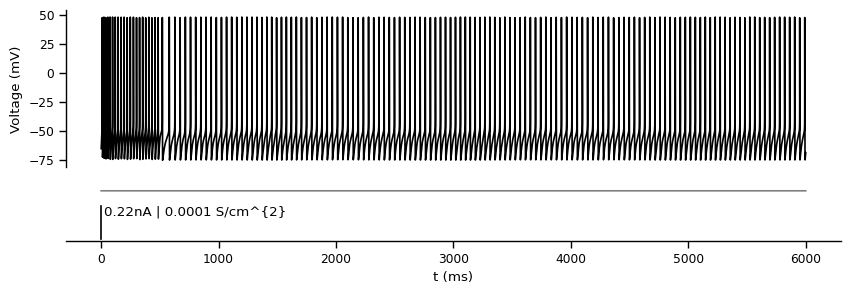

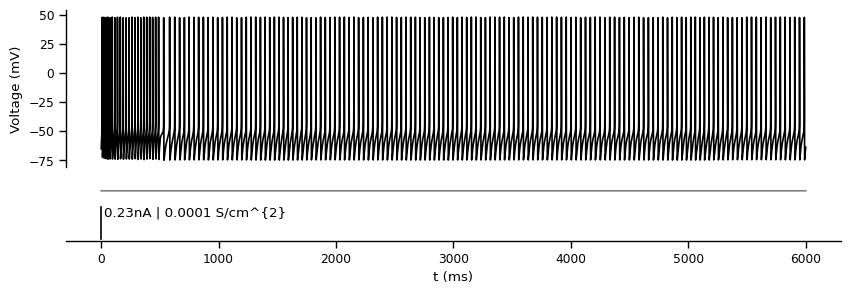

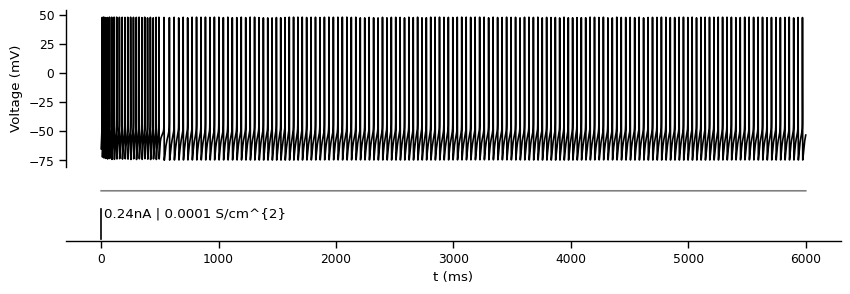

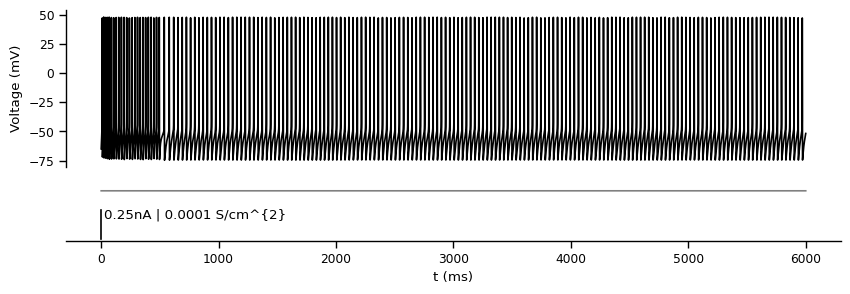

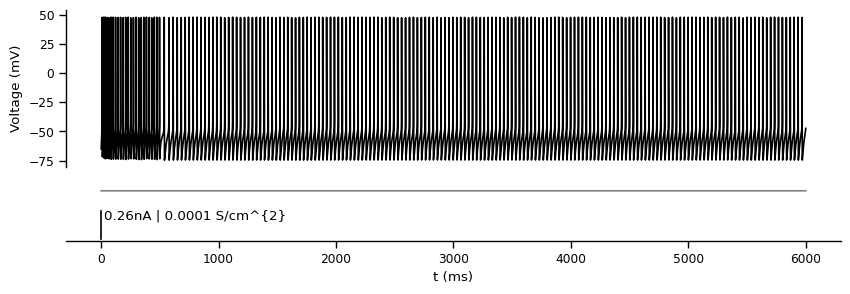

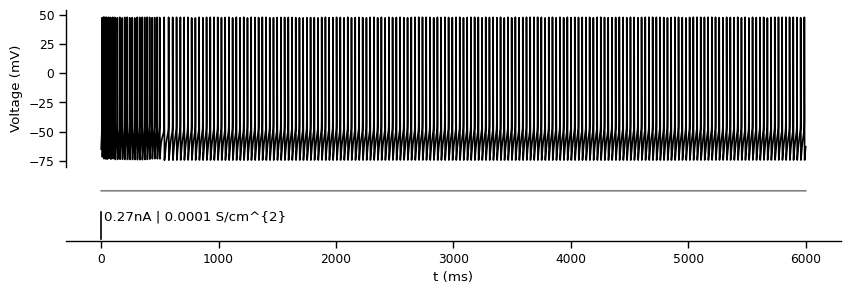

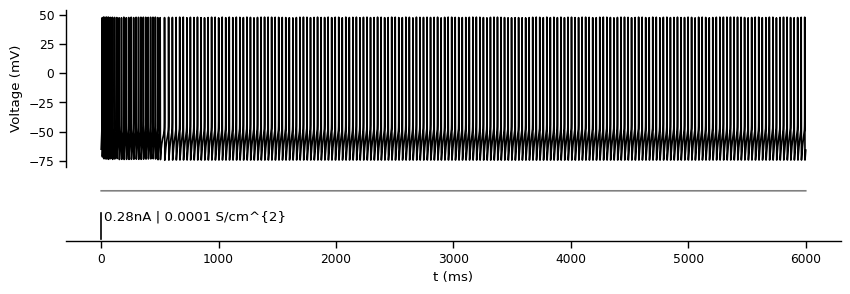

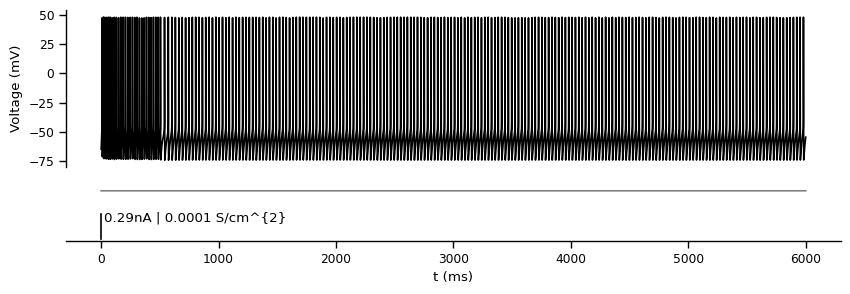

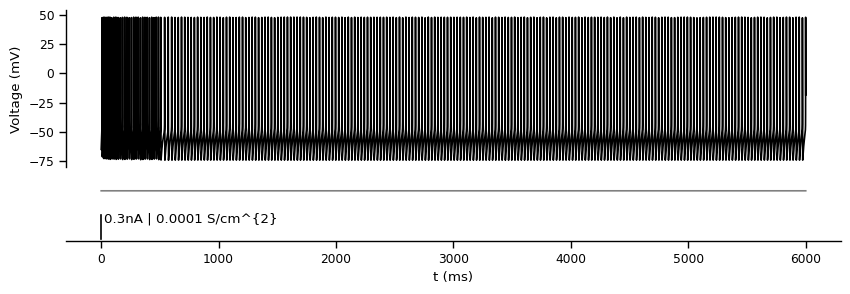

In [7]:
for key, data in datas.items():
    plotPotential(data)

# Aplicar diagnosticos



$$Z_j(t) = \Big| \frac{1}{2\delta + 1} \sum_{|j-k| \le \delta} e^{i\theta_k(t)}\Big|$$


I need to tweak the code to get the phase as a function of the spike time


$$\theta_k(t) = 2\pi m + \frac{t- t_{k,m}}{t_{k, m+1} - t_{k,m}}$$






In [151]:
statData = []

spkinds = datas['0.09_0.0001']['simData']['spkid']
spkts = datas['0.09_0.0001']['simData']['spkt']

spkmat = [[spkt for spkind, spkt in zip(spkinds, spkts) if spkind == gid] for gid in set(range(100))]
isimat = [[t - s for s, t in zip(spks, spks[1:])] for spks in spkmat if len(spks) > 10]
# interspike interval
isicv = [np.std(x) / np.mean(x) if len(x) > 0 else 0 for x in isimat]  # if len(x)>0]
statData.append(isicv)

In [152]:
isicv = np.array(isicv)

Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...


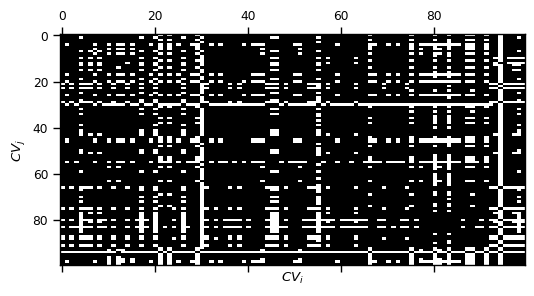

In [159]:
from pyunicorn.timeseries import RecurrencePlot

#  Settings for the embedding
DIM = 1  # Embedding dimension
TAU = 0  # Embedding delay

# Distance metric in phase space ->
# Possible choices ("manhattan","euclidean","supremum")
METRIC = 'euclidean'

EPS = 0.1  # Fixed recurrence threshold

rp_4 = RecurrencePlot(isicv, dim=DIM, tau=TAU, metric=METRIC,
                    normalize=False, threshold=EPS)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,3), sharex=True, sharey=True)

ax.matshow(rp_4.recurrence_matrix(), cmap='binary', aspect='auto')

ax.set_xlabel(r'$CV_i$')
ax.set_ylabel(r'$CV_j$')
plt.show()

In [160]:
rr_matrix = rp_4.recurrence_matrix()

In [161]:
teste = np.zeros((100))

for i, rr in enumerate(rr_matrix):
    teste[i] = rr.mean()

In [165]:
teste.std()/teste.mean()

0.18627650838976745

<AxesSubplot:>

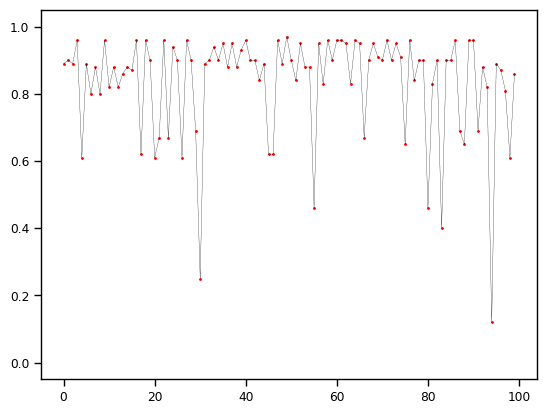

In [163]:
plt.figure()
plt.ylim(-0.05,1.05)
sns.scatterplot(teste, color='red', s=5)
sns.lineplot(teste, color='black', linewidth=0.2)

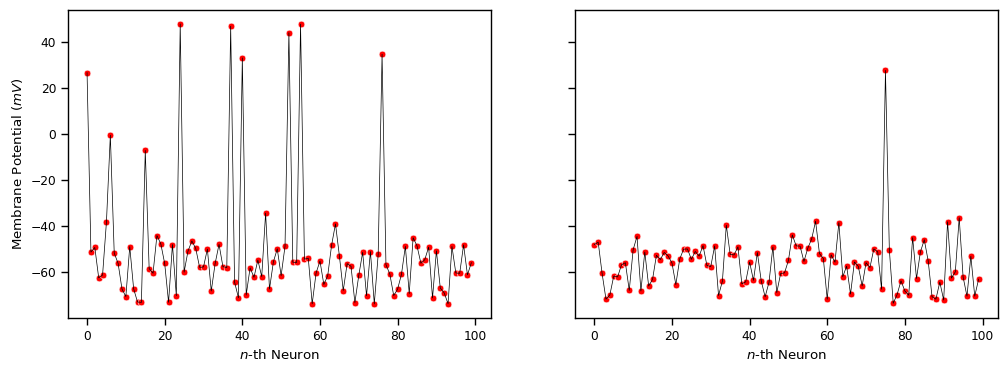

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,4), sharey=True)
sns.scatterplot(mapa[:,4000], ax=ax[0], color='red')
sns.lineplot(mapa[:,4000], ax=ax[0], color='black', linewidth=0.5)

sns.scatterplot(mapa[:,5000], ax=ax[1], color='red')
sns.lineplot(mapa[:,5000], ax=ax[1], color='black', linewidth=0.5)

ax[0].set_ylabel('Membrane Potential ($mV$)')
ax[0].set_xlabel('$n$-th Neuron')
ax[1].set_xlabel('$n$-th Neuron')

plt.show()

In [ ]:
zk_4 = param_local_order(mapa[:,-4000], datas['0.2_0.0001']['simConfig']['n_neighbors'])
zk_5 = param_local_order(mapa[:,-5000], datas['0.2_0.0001']['simConfig']['n_neighbors'])

In [ ]:
def param_local_order(spatial_pattern, n_neighbors):
    spatial_pattern = np.array(spatial_pattern)
    n = len(spatial_pattern)
    n_neighbors = int(n_neighbors/2)
    # e^{i(theta_k)} = cos(theta_k) + i sin(theta_k)
    real = np.zeros_like(spatial_pattern, dtype='g') 
    complx = np.zeros_like(spatial_pattern, dtype='g')
    Zk = np.zeros_like(spatial_pattern, dtype='g')

    for i in range(n):
        for k in range(-n_neighbors, n_neighbors+1):
            if i!=(k+i): # not autoconection
                real[i%n] += np.cos(2*np.pi*spatial_pattern[(k+i)%n]) # real part
                complx[i%n] += np.sin(2*np.pi*spatial_pattern[(k+i)%n]) # img part       
        Zk[i%n] += real[(i)%n]*real[(i)%n] + complx[(i)%n]*complx[(i)%n] # 
        Zk[i%n] = abs((1.0/(2*n_neighbors))*np.sqrt(Zk[i%n])) # len fasor.

    return Zk

In [ ]:
for key in datas.keys():
    mapa = get_numpy(datas[key])
    zk = param_local_order(mapa, datas[key]['simConfig']['n_neighbors'])
    datas[key]['zk'] = zk

In [ ]:
def plot_zk(data, figsize=(8,2), ti=-4000, tf = -1):
    mapa = get_numpy(data)
    gex = data['simConfig']['gex']
    amp = data['simConfig']['IClamp0']['amp']
    t = data['simConfig']['duration']
    
    fig, ax = plt.subplots(figsize = figsize)
    heatmap = sns.heatmap(data['zk'][:,ti:tf], cmap='gnuplot', ax=ax,
                        cbar_kws={'label': '$Z_i$'}, vmin=0, vmax=1)
    
    heatmap.set(xlim = (0,-1*ti))
    xlabels = t - heatmap.get_xticks()
    xlabels = ['{:,.2f}'.format(x) if i%2!=0 else '' for i, x in enumerate(xlabels/1000)]
    xlabels = xlabels[::-1]
    heatmap.set_xticklabels(xlabels)

    plt.xticks(rotation=30)
    label_gex = f'{gex}'+' S/cm^{2}'
    plt.title(f'Param local order, network parameters:\n gex = ${label_gex}$ | amp = {amp}', pad=20, fontsize=14)
    plt.ylabel('$n$-th neuron')
    plt.xlabel('time ($s$)')

    
    plt.show()
    

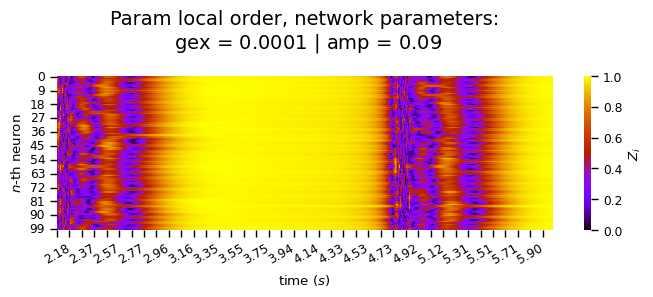

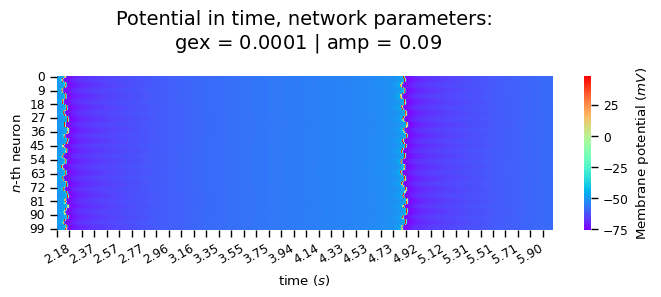

In [ ]:
plot_zk(datas['0.09_0.0001'], figsize=(8,2), ti=-3900)
plotPotentialTime(datas['0.09_0.0001'], figsize=(8,2), ti=-3900)

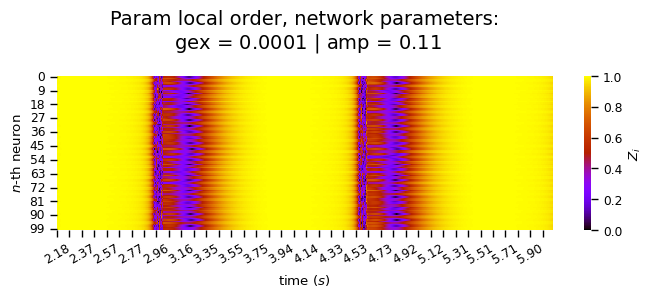

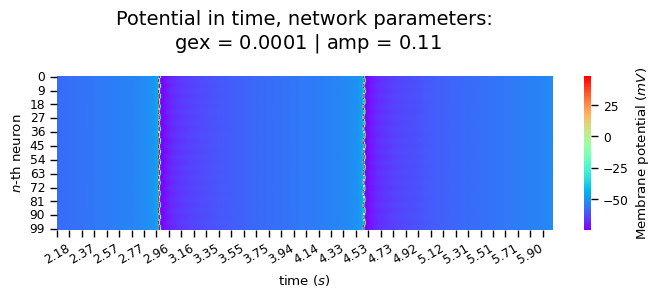

In [ ]:
plot_zk(datas['0.11_0.0001'], figsize=(8,2), ti=-3900)
plotPotentialTime(datas['0.11_0.0001'], figsize=(8,2), ti=-3900)

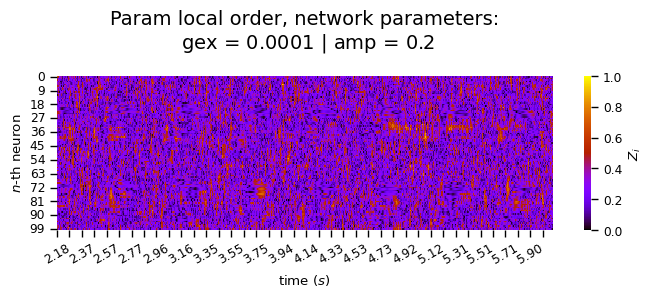

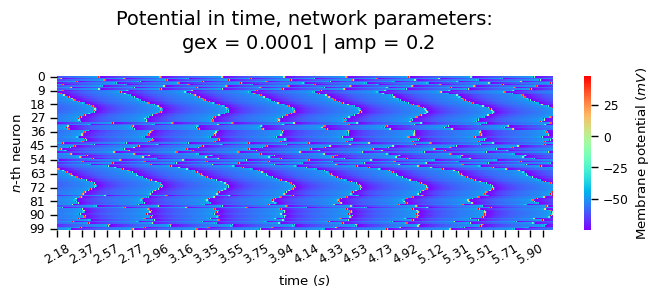

In [ ]:
plot_zk(datas['0.2_0.0001'], figsize=(8,2), ti=-3900)
plotPotentialTime(datas['0.2_0.0001'], figsize=(8,2), ti=-3900)

# Recurrence Analysis


In [ ]:
mapa = get_numpy(datas['0.3_0.0001'])

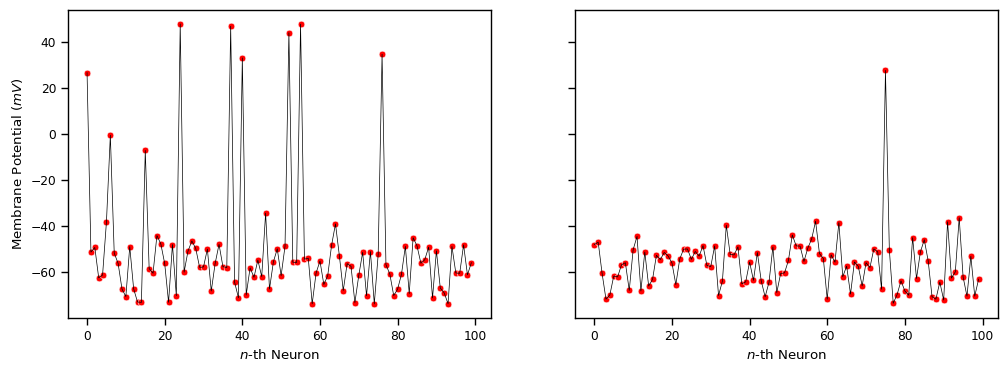

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,4), sharey=True)
sns.scatterplot(mapa[:,4000], ax=ax[0], color='red')
sns.lineplot(mapa[:,4000], ax=ax[0], color='black', linewidth=0.5)

sns.scatterplot(mapa[:,5000], ax=ax[1], color='red')
sns.lineplot(mapa[:,5000], ax=ax[1], color='black', linewidth=0.5)

ax[0].set_ylabel('Membrane Potential ($mV$)')
ax[0].set_xlabel('$n$-th Neuron')
ax[1].set_xlabel('$n$-th Neuron')

plt.show()

In [ ]:
zk_4 = param_local_order(mapa[:,-4000], datas['0.2_0.0001']['simConfig']['n_neighbors'])
zk_5 = param_local_order(mapa[:,-5000], datas['0.2_0.0001']['simConfig']['n_neighbors'])

Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...


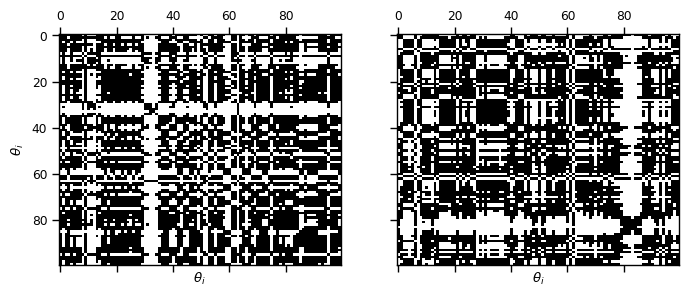

In [ ]:
from pyunicorn.timeseries import RecurrencePlot

#  Settings for the embedding
DIM = 1  # Embedding dimension
TAU = 0  # Embedding delay

# Distance metric in phase space ->
# Possible choices ("manhattan","euclidean","supremum")
METRIC = 'euclidean'

EPS = 0.15  # Fixed recurrence threshold

rp_4 = RecurrencePlot(zk_4, dim=DIM, tau=TAU, metric=METRIC,
                    normalize=False, threshold=EPS)

rp_5 = RecurrencePlot(zk_5, dim=DIM, tau=TAU, metric=METRIC,
                    normalize=False, threshold=EPS)

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8,3), sharex=True, sharey=True)

ax[0].matshow(rp_4.recurrence_matrix(), cmap='binary', aspect='auto')
ax[1].matshow(rp_5.recurrence_matrix(), cmap='binary', aspect='auto')

ax[0].set_xlabel(r'$\theta_i$')
ax[1].set_xlabel(r'$\theta_i$')
ax[0].set_ylabel(r'$\theta_i$')
plt.show()

# Analysis data3

In [7]:
import pickle
import json

def get_infos_batch(path_data:str, version:int, bactch_number:int, sub_batch_number:int):
    """
    Retrieves various information from pickle and JSON files based on the provided version, batch number, and sub-batch number.

    Args:
        path_data (str): Path of folder that contains the data.
        version (int): The version number.
        bactch_number (int): The batch number.
        sub_batch_number (int): The sub-batch number.

    Returns:
        dict: A dictionary containing the following information:
            - 'path_file' (str): The path of the data file.
            - 'gex' (float): Value obtained from the 'simConfig' dictionary in the pickle file.
            - 'amp' (float): Value obtained from the 'IClamp0' dictionary in the pickle file.
            - 'cv' (dict): Data obtained from the 'statData' dictionary in the CV JSON file.
            - 'rate' (dict): Data obtained from the 'statData' dictionary in the rate JSON file.
            - 'sync' (dict): Data obtained from the 'statData' dictionary in the sync JSON file.

    Raises:
        Exception: If an error occurs while opening any of the required files.

    """
    bactch_number = str(bactch_number).zfill(4)
    path_files = f'../{path_data}/v{version}_batch{bactch_number}/v{version}_batch{bactch_number}_0_{sub_batch_number}'

    infos = {}
    infos['path_file'] = path_files
    try:
        with open(path_files+'_data.pkl', 'rb') as f:
            data = pickle.load(f)
            gex = data['simConfig']['gex']
            amp = data['simConfig']['IClamp0']['amp']

            infos['gex'] = gex
            infos['amp'] = amp
    except:
        print('Error to open: ' + path_files + '_data.pkl')
        return None
    
    try:
        with open(path_files+'_CV.json', 'rb') as f:
            data = json.load(f)
            cv = data['statData']
            infos['cv'] = cv
    except:
        print('Error to open: ' + path_files + '_CV.json')
        return None
        
    try:
        with open(path_files+'_rate.json', 'rb') as f:
            data = json.load(f)
            rate = data['statData']
            infos['rate'] = rate
    except:
        print('Error to open: ' + path_files + '_rate.json')
        return None
    
    try:
        with open(path_files+'_sync.json', 'rb') as f:
            data = json.load(f)
            sync = data['statData']
            infos['sync'] = sync
    except:
        print('Error to open: ' + path_files + '_sync.json')
        return None
    
    return infos   


In [14]:
batches = {}
for batch in range(1,69):
    for sub_batch in range(5):
        infos = get_infos_batch('data3', 3,batch,sub_batch)
        if infos!= None: batches[f'{batch}_{sub_batch}'] = infos    

Error to open: ../data3/v3_batch0002/v3_batch0002_0_4_data.pkl
Error to open: ../data3/v3_batch0003/v3_batch0003_0_4_data.pkl
Error to open: ../data3/v3_batch0004/v3_batch0004_0_4_data.pkl
Error to open: ../data3/v3_batch0006/v3_batch0006_0_4_data.pkl
Error to open: ../data3/v3_batch0007/v3_batch0007_0_4_data.pkl
Error to open: ../data3/v3_batch0008/v3_batch0008_0_4_data.pkl
Error to open: ../data3/v3_batch0010/v3_batch0010_0_4_data.pkl
Error to open: ../data3/v3_batch0011/v3_batch0011_0_4_data.pkl
Error to open: ../data3/v3_batch0012/v3_batch0012_0_4_data.pkl
Error to open: ../data3/v3_batch0014/v3_batch0014_0_4_data.pkl
Error to open: ../data3/v3_batch0015/v3_batch0015_0_4_data.pkl
Error to open: ../data3/v3_batch0016/v3_batch0016_0_4_data.pkl
Error to open: ../data3/v3_batch0018/v3_batch0018_0_4_data.pkl
Error to open: ../data3/v3_batch0019/v3_batch0019_0_4_data.pkl
Error to open: ../data3/v3_batch0020/v3_batch0020_0_4_data.pkl
Error to open: ../data3/v3_batch0022/v3_batch0022_0_4_d

In [15]:
batches.keys()

dict_keys(['1_0', '1_1', '1_2', '1_3', '1_4', '2_0', '2_1', '2_2', '2_3', '3_0', '3_1', '3_2', '3_3', '4_0', '4_1', '4_2', '4_3', '5_0', '5_1', '5_2', '5_3', '5_4', '6_0', '6_1', '6_2', '6_3', '7_0', '7_1', '7_2', '7_3', '8_0', '8_1', '8_2', '8_3', '9_0', '9_1', '9_2', '9_3', '9_4', '10_0', '10_1', '10_2', '10_3', '11_0', '11_1', '11_2', '11_3', '12_0', '12_1', '12_2', '12_3', '13_0', '13_1', '13_2', '13_3', '13_4', '14_0', '14_1', '14_2', '14_3', '15_0', '15_1', '15_2', '15_3', '16_0', '16_1', '16_2', '16_3', '17_0', '17_1', '17_2', '17_3', '17_4', '18_0', '18_1', '18_2', '18_3', '19_0', '19_1', '19_2', '19_3', '20_0', '20_1', '20_2', '20_3', '21_0', '21_1', '21_2', '21_3', '21_4', '22_0', '22_1', '22_2', '22_3', '23_0', '23_1', '23_2', '23_3', '24_0', '24_1', '24_2', '24_3', '25_0', '25_1', '25_2', '25_3', '25_4', '26_0', '26_1', '26_2', '26_3', '27_0', '27_1', '27_2', '27_3', '28_0', '28_1', '28_2', '28_3', '29_0', '29_1', '29_2', '29_3', '29_4', '30_0', '30_1', '30_2', '30_3', '31_

In [19]:
batches['1_4']['cv'][0]

[0.20557292177344458,
 0.2372707722609951,
 0.20277174789978272,
 0.22900935898731162,
 0.1770032547064485,
 0.20448178752941643,
 0.1827942612251992,
 0.24515396498314787,
 0.18108079908129546,
 0.2186831899655688,
 0.24917110770961273,
 0.20898855617830653,
 0.24792662073933402,
 0.2474331992998738,
 0.19929736338203427,
 0.24821078772967392,
 0.21851683632321503,
 0.18500048913405878,
 0.20886584375258585,
 0.24081806666964917,
 0.18559472406655925,
 0.2682461179225242,
 0.23040291521428755,
 0.2589510559692533,
 0.2023641622450962,
 0.23709271699563458,
 0.18498255168734987,
 0.22965055426263845,
 0.22648682068548795,
 0.24956116723321722,
 0.15513852598888356,
 0.19950089494827064,
 0.23959874095904515,
 0.20063222830160682,
 0.23697180028587972,
 0.21656197425192117,
 0.2048836617416523,
 0.21687471121355886,
 0.20377735716107379,
 0.2227875712901773,
 0.21835025599711336,
 0.23722486011364838,
 0.22719289899775555,
 0.24732902803279874,
 0.20219376652034537,
 0.18318339973924214